 # Time Series Econometrics- Homework 1
   ### Rezvan Derayati
   #### March 2020
  
  

In [171]:
import Pkg; Pkg.add("StatsModels")
import Pkg; Pkg.add("LinearAlgebra")
import Pkg; Pkg.add("Statistics")
import Pkg; Pkg.add("FredData")
import Pkg; Pkg.add("Plots")
import Pkg; Pkg.add("DataFrames")
using LinearAlgebra
using DataFrames
using StatsModels
using Statistics
using FredData
using Plots
api_key = "f091188cc8826a8a5c4a8cb1b555d4b4"

 Resolving package versions...
  Updating `C:\Users\Rezvan\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\Rezvan\.julia\environments\v1.3\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Rezvan\.julia\environments\v1.3\Project.toml`
  [37e2e46d] + LinearAlgebra 
  Updating `C:\Users\Rezvan\.julia\environments\v1.3\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Rezvan\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\Rezvan\.julia\environments\v1.3\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Rezvan\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\Rezvan\.julia\environments\v1.3\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Rezvan\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\Rezvan\.julia\environments\v1.3\Manifest.toml`
 [no changes]
 Resolving pac

"f091188cc8826a8a5c4a8cb1b555d4b4"

In [172]:
f = Fred(api_key)

FRED API Connection
	url: https://api.stlouisfed.org/fred/
	key: f091188cc8826a8a5c4a8cb1b555d4b4


In [203]:
gdp = get_data(f, "GDPC1"; frequency="q") #Fetching GDP data from FRED database

FredSeries
	id: GDPC1
	title: Real Gross Domestic Product
	units: Billions of Chained 2012 Dollars
	seas_adj (native): Seasonally Adjusted Annual Rate
	freq (native): Quarterly
	realtime_start: 2020-03-18
	realtime_end: 2020-03-18
	last_updated: 2020-02-27T14:01:08
	notes: BEA Account Code: A191RX Real gross domestic product is the inflation adjusted value of the goods and services produced by labor and property located in the United States.For more information see the Guide to the National Income and Product Accounts of the United States (NIPA). For more information, please visit the Bureau of Economic Analysis (http://www.bea.gov/national/pdf/nipaguid.pdf).
	trans_short: lin
	data: 292x4 DataFrame with columns Symbol[:realtime_start, :realtime_end, :date, :value]


In [175]:
gdp.data

,realtime_start,realtime_end,date,value
,Dates…,Dates…,Dates…,Float64
1,2020-03-18,2020-03-18,1947-01-01,2033.06
2,2020-03-18,2020-03-18,1947-04-01,2027.64
3,2020-03-18,2020-03-18,1947-07-01,2023.45
4,2020-03-18,2020-03-18,1947-10-01,2055.1
5,2020-03-18,2020-03-18,1948-01-01,2086.02
6,2020-03-18,2020-03-18,1948-04-01,2120.45
7,2020-03-18,2020-03-18,1948-07-01,2132.6
8,2020-03-18,2020-03-18,1948-10-01,2134.98
9,2020-03-18,2020-03-18,1949-01-01,2105.56


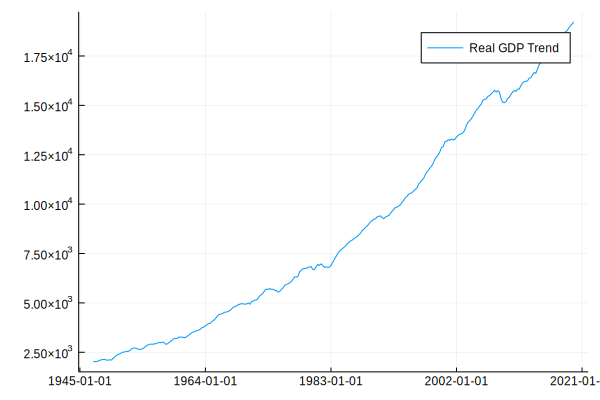

In [204]:
plot(gdp.data[!,:date], gdp.data[!,:value], labels = "Real GDP Trend")

To work with (an approximately) stationary series we will work with GDP growth. It is customory to approximate the GDP growth through log changes. If we use $Y_t$ to denote GDPC1 at $t$, then the logarithmic change is
$$
\Delta Y_t = \log(Y_t) - \log(Y_{t-1}).
$$
We have to calculate $\Delta Y_t$ manually 

In [205]:
## We multiply by four to express rates in annualized form
gdp.data[!, :DY] .= (log.(gdp.data[!,:value]) .- (lag(log.(gdp.data[!,:value]), default = NaN)))*100*4

292-element Array{Float64,1}:
 NaN                 
  -1.0681908483217484
  -0.8268392866778385
   6.208401827696264 
   5.972215106909573 
   6.548729678436516 
   2.2850497876437004
   0.4467170257758113
  -5.5501329880069505
  -1.3667185678936988
   4.10848989268473  
  -3.371267109580245 
  15.419428073733243 
   ⋮                 
   2.260737759350917 
   2.131895991455224 
   3.1507484002780473
   3.484227570437781 
   2.5198720642244155
   3.453511478231519 
   2.884168242937335 
   1.08386113670349  
   3.049176055333902 
   1.9938094687645957
   2.0816883175427847
   2.0735330264265883

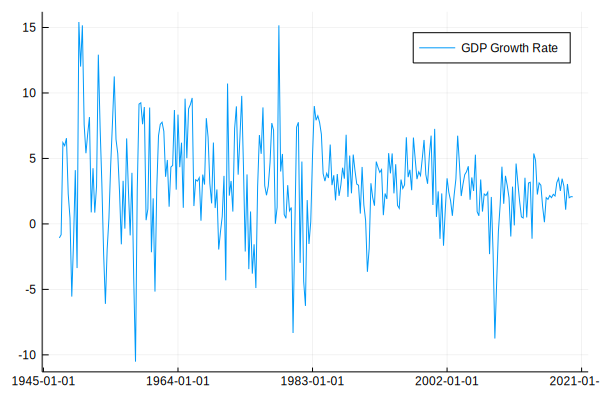

In [206]:
plot(gdp.data[!,:date], gdp.data[!,:DY],label="GDP Growth Rate")

We now calculate the sample autocovariance of `DY`. The sample autocovariance of order $h$ is given by

$$
\hat{\gamma}(h) = \frac{1}{T-h-1}\sum_{i=h+1}^T (Y_t - \bar{Y})(Y_{t-h} - \bar{Y}) 
$$
The function `gammahat_one` below calculates the sample autocovariance of order $1$, i.e. $\hat{\gamma}(1)$. 

In [180]:
function gammahat_one(Y)
    ## Careful, we are assuming that there are no NaN
    Ybar = mean(Y)
    YY = Y .- Ybar   ## the dot indicates elementwise subtraction
    c = YY .* lag(YY, 1, default=NaN)  ## Note: lag(Y, h) => h-th lag
    sum(c[2:end])/(length(Y)-1)  ## don't get the first element of `c` because is NaN
end

gammahat_one(gdp.data[2:end,:DY])

4.961702949766932

### Part 1
#### 1) Writing a function that calculate the sample autocovariance function for arbitrary  ℎ 

In [181]:
function gammahat_h(Y,h)
    ## Careful, we are assuming that there are no NaN
    Ybar = mean(Y)
    YY = Y .- Ybar   ## the dot indicates elementwise subtraction
    c = YY .* lag(YY, h, default=NaN)  ## Note: lag(Y, h) => h-th lag
    sum(c[h+1:end])/(length(Y)-h)  ## don't get the first element of `c` because is NaN
end
h=1 #just as an example,considering the lag equal to 1
gammahat_h(gdp.data[h+1:end,:DY],h)

4.961702949766932

#### 2) Writing a function that calculates the sample autocorrelations  $$\hat{\rho}(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}$$which
###### $$\hat{\gamma(0)}= \frac{1}{T-1}\sum_{t=1}^{T}(Y_{t}-\bar{Y})^{2}$$
#### is the sample variance of $Y_{t}$.


In [222]:
function gammahat_zero(Y) 
    ## Careful, we are assuming that there are no NaN
    Ybar = mean(Y)
    YY = Y .- Ybar   
    c = YY .*YY  
    sum(c[2:end])/(length(Y))  
end

gammahat_zero(gdp.data[2:end,:DY])

13.69695977354038

In [184]:
function rho(Y,h)
    ## rho is the sample autocorrelations function
  rho = (gammahat_h(Y,h))/(gammahat_zero(Y))
end
h=2 #just as an example,considering the lag equal to 2
rho(gdp.data[h+1:end,:DY],h)

0.23418345096234794

#### 3) Plotting the sample autocovariances and autocorrelations function (for ℎ=1,…,30 )

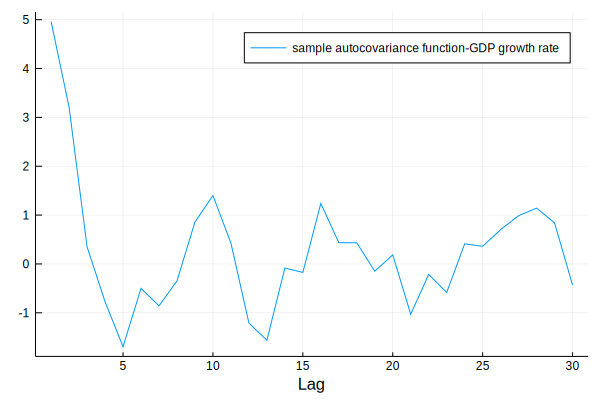

In [214]:
h = collect(1:1:30)
plot(h,[gammahat_h(gdp.data[h+1:end,:DY],h) for h = 1:30],labels = "sample autocovariance function-GDP growth rate",xlabel="Lag")

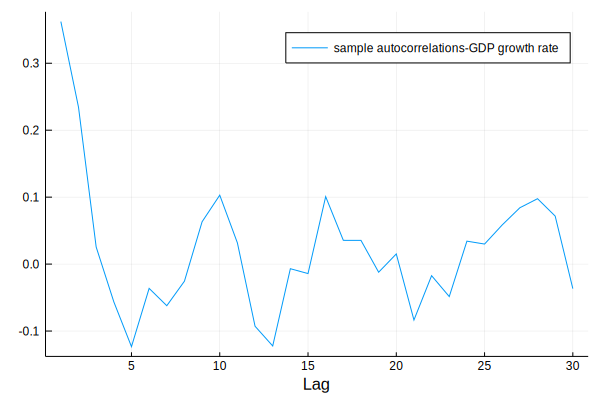

In [215]:
h = collect(1:1:30)
plot(h,[rho(gdp.data[h+1:end,:DY],h) for h = 1:30],labels = "sample autocorrelations-GDP growth rate",xlabel="Lag")

### Part 2
#### 4) Getting the Consumer Price Index (CPIAUCSL) using DataFred. I consider the monthly frequency because it is mentioned that freq(native) in monthly.

In [217]:
CPI = get_data(f, "CPIAUCSL"; frequency="m")

FredSeries
	id: CPIAUCSL
	title: Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
	units: Index 1982-1984=100
	seas_adj (native): Seasonally Adjusted
	freq (native): Monthly
	realtime_start: 2020-03-18
	realtime_end: 2020-03-18
	last_updated: 2020-03-11T12:43:02
	notes: The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a measure of the average monthly change in the price for goods and services paid by urban consumers between any two time periods. It can also represent the buying habits of urban consumers. This particular index includes roughly 88 percent of the total population, accounting for wage earners, clerical workers, technical workers, self-employed, short-term workers, unemployed, retirees, and those not in the labor force. The CPIs are based on prices for food, clothing, shelter, and fuels; transportation fares; service fees (e.g., water and sewer service); and sales taxes. Prices are collected monthly from about 4,000 housi

In [218]:
CPI.data

,realtime_start,realtime_end,date,value
,Dates…,Dates…,Dates…,Float64
1,2020-03-18,2020-03-18,1947-01-01,21.48
2,2020-03-18,2020-03-18,1947-02-01,21.62
3,2020-03-18,2020-03-18,1947-03-01,22.0
4,2020-03-18,2020-03-18,1947-04-01,22.0
5,2020-03-18,2020-03-18,1947-05-01,21.95
6,2020-03-18,2020-03-18,1947-06-01,22.08
7,2020-03-18,2020-03-18,1947-07-01,22.23
8,2020-03-18,2020-03-18,1947-08-01,22.4
9,2020-03-18,2020-03-18,1947-09-01,22.84


In [219]:
CPI.data[!, :value]

878-element Array{Float64,1}:
  21.48 
  21.62 
  22.0  
  22.0  
  21.95 
  22.08 
  22.23 
  22.4  
  22.84 
  22.91 
  23.06 
  23.41 
  23.68 
   ⋮    
 254.095
 254.943
 255.167
 255.402
 256.087
 256.294
 256.593
 257.229
 257.824
 258.444
 258.82 
 259.05 

#### 5) Calculating the Inflation rate as the log changes of the CPI index

In [220]:
CPI.data[!, :inflation] .= (log.(CPI.data[!,:value]) .- (lag(log.(CPI.data[!,:value]), default = NaN)))*100*12 #multiply it by 12 because in this case is monthly

878-element Array{Float64,1}:
 NaN                 
   7.795851084477867 
  20.908369376704705 
   0.0               
  -2.730376604563034 
   7.086098265257057 
   8.124607880652945 
   9.141877061866666 
  23.342911112178477 
   3.672134013113748 
   7.831222050610442 
  18.076519994287743 
  13.76103421558259  
   ⋮                 
   4.324277856199998 
   3.9981335041510135
   1.0538904051177411
   1.1046499882048977
   3.2141472892970313
   0.9695910407060637
   1.3991387601841154
   2.9706800789696786
   2.7725314389766   
   2.8822253468046455
   1.7445640116818595
   1.065904640727311 

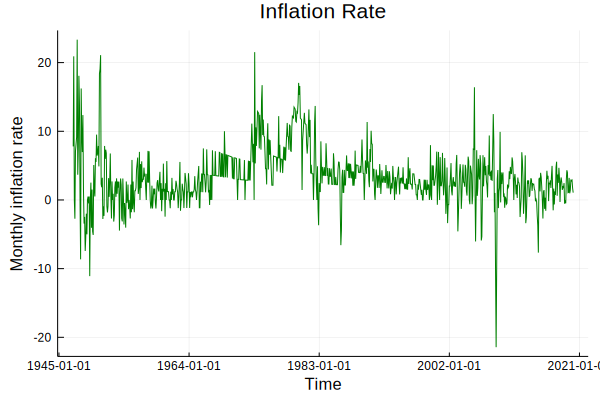

In [221]:
plot(CPI.data[!,:date], CPI.data[!,:inflation],title = "Inflation Rate", ylabel="Monthly inflation rate", xlabel="Time",label="",color="green")

#### 6) Plotting the sample autocovariance and autocorrelation function for inflation rate

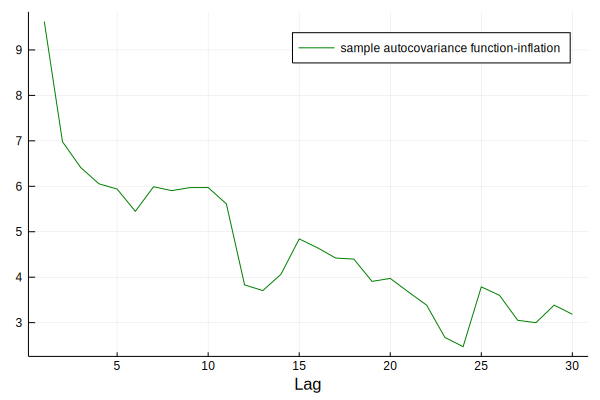

In [201]:
h = collect(1:1:30)
plot(h,[gammahat_h(CPI.data[h+1:end,:inflation],h) for h = 1:30],labels = "sample autocovariance function-inflation",xlabel="Lag",color="green")

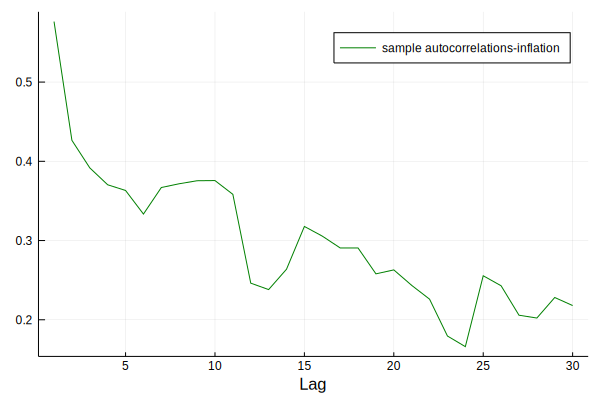

In [202]:
h = collect(1:1:30)
plot(h,[rho(CPI.data[h+1:end,:inflation],h) for h = 1:30],labels = "sample autocorrelations-inflation",xlabel="Lag",color="green")